### [Problem 1] Understanding the content of the competition

#### What kind of company is Home Credit?
Home Credit is an international consumer finance provider, which focuses on responsible lending primarily to people with little or no credit history

#### What is expected in this competition?
Home credit expect Kagglers to help them ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

#### What are the benefits companies can gain by predicting this?
it will increase their profitability since they will know if clients are going to pay them back

### [Problem 2] Understanding the overview of data

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
application = pd.read_csv('application_train.csv')

application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [88]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [89]:
# checking missing values

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending= False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending= False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(application)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [90]:
# Number of columns with missing values
application.isnull().any(axis=0).sum()

67

In [91]:
# Number of rows with missing values
application.isnull().any(axis=1).sum()

298909

#### A graph showing the percentage of classes

<function matplotlib.pyplot.show(close=None, block=None)>

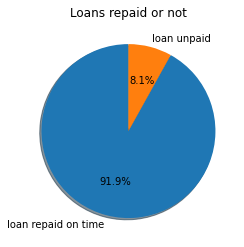

In [92]:
# x = application.drop['TARGET'], axis=1
y = application.loc[:, 'TARGET']
label_counts = y.value_counts()
labels = 'loan repaid on time', 'loan unpaid'

plt.title('Loans repaid or not')
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show

### [Question 3] Project setting

- What is the gender ratio of loan applications?
- loan repayment based on gender , which gender pays well ?
- what are ages of clients and how does it relate to repayment on time?
- which type of loan did the client take?
- what is the education level of the client?
- Does the client own a car?
- Does the client own a flat or a house?
- What is the housingsituation of the client and his family status as well as the number of children he has?
- what are income type of applicants?
- what is the martal status of applicants?
- Who was accompanying client when he was applying for the loan?
- What kind of accupation does the client have and to which field of activity does he belong to?


### [Problem 4] Data search

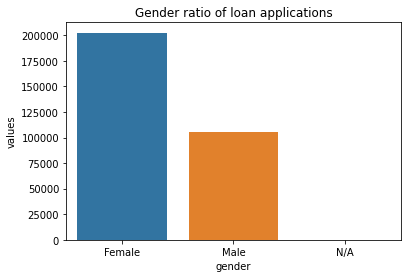

In [93]:
# Gender ration
gender = application['CODE_GENDER'].value_counts()
df = pd.DataFrame({'gender':['Female','Male','N/A'],'values': gender.values})
plt.title('Gender ratio of loan applications')
sns.barplot(x ='gender',y='values',data=df)
plt.show()

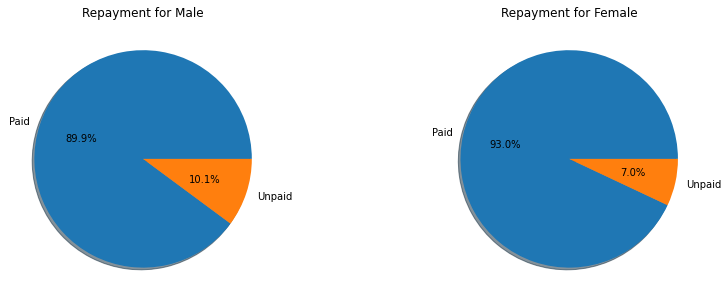

In [94]:
# which genger repays well?
male = application.loc[:,'CODE_GENDER'][application.loc[:,'CODE_GENDER']== 'M']
female = application.loc[:,'CODE_GENDER'][application.loc[:,'CODE_GENDER']== 'F']
male
male_unpaid= application.loc[((application['TARGET']==1) & (application['CODE_GENDER'] == 'M'))]
female_unpaid= application.loc[((application['TARGET']==1) & (application['CODE_GENDER'] == 'F'))]

male_paid = len(male) - len(male_unpaid)
female_paid = len(female) - len(female_unpaid)


labels = 'Paid', 'Unpaid'
samples_M = [male_paid, len(male_unpaid)]
samples_F = [female_paid, len(female_unpaid)]

fig, axes = plt.subplots(1,2)

axes[0].pie(samples_M, labels=labels, autopct='%1.1f%%',shadow=True)
axes[0].set_title('Repayment for Male')

axes[1].pie(samples_F, labels=labels, autopct='%1.1f%%',shadow=True)
axes[1].set_title('Repayment for Female')

fig.set_size_inches(14,5)
plt.show()




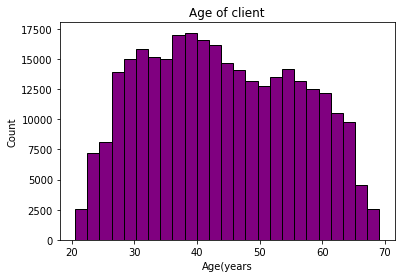

In [95]:
# clients Ages
plt.hist(application['DAYS_BIRTH']/ -365,edgecolor='k', bins=25, color='purple')
plt.title('Age of client')
plt.xlabel('Age(years')
plt.ylabel('Count')
plt.show()

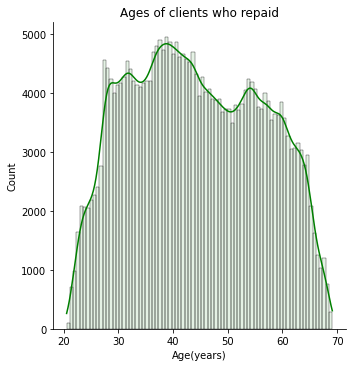

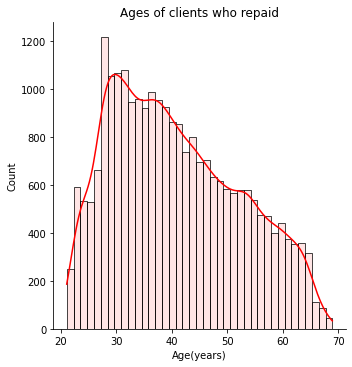

In [96]:
age_paid = application.loc[application['TARGET'] == 0, 'DAYS_BIRTH'] / -365
age_unpaid = application.loc[application['TARGET'] == 1, 'DAYS_BIRTH'] / -365

sns.displot(age_paid,color='green',alpha=0.1,kde=True)
plt.xlabel('Age(years)')
plt.title('Ages of clients who repaid')

sns.displot(age_unpaid,color='red',alpha=0.1,kde=True)
plt.xlabel('Age(years)')
plt.title('Ages of clients who repaid')

plt.show()

people in 40's repays better than the rest

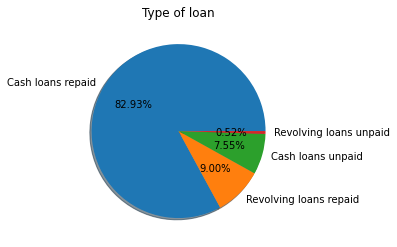

In [97]:
# which type of loans do clients take mostly
loan_type = application[['TARGET','NAME_CONTRACT_TYPE']]

labels= 'Cash loans repaid', 'Revolving loans repaid', 'Cash loans unpaid', 'Revolving loans unpaid'
loan_type.value_counts().plot.pie(labels=labels,shadow=True,autopct="%.2f%%")
plt.ylabel('')
plt.title('Type of loan')
plt.show()

Cash loans rapid is the mostly taken loan

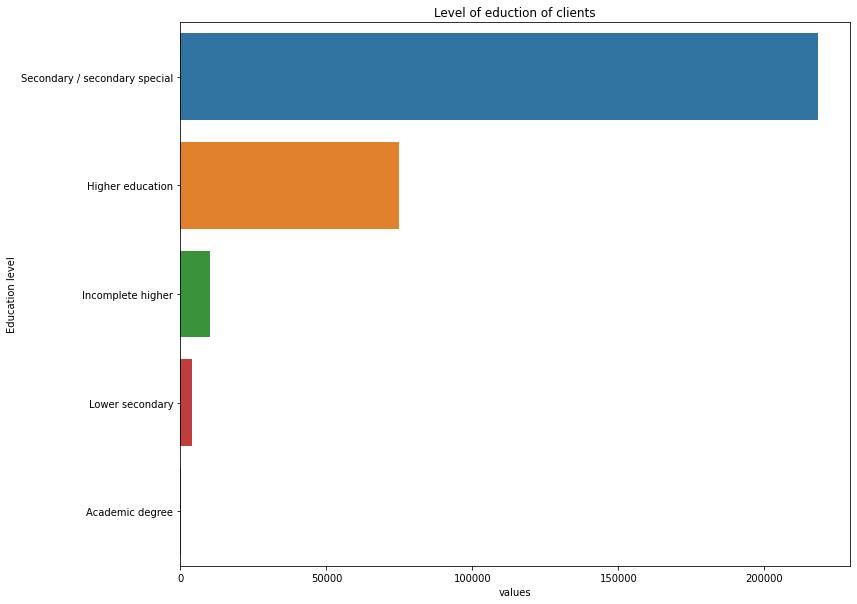

In [98]:
# education level of clients
def barplot(feature,name,title):
    f= application[feature].value_counts()
    df= pd.DataFrame({name:f.index,'values':f.values})
    plt.title(title)
    sns.barplot(y=name,x='values', data=df)
    fig=plt.gcf()
    fig.set_size_inches(12,10)
    plt.show()
def stats(feature):
    percentage= application[[feature, 'TARGET']].groupby([feature],as_index=False).mean().round(3)
    percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    return percentage
barplot('NAME_EDUCATION_TYPE','Education level', 'Level of eduction of clients')

most of client level of education is secondary/ secondary special

In [99]:
# client education level table
stats('NAME_EDUCATION_TYPE')

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109
4,Secondary / secondary special,0.089
2,Incomplete higher,0.085
1,Higher education,0.054
0,Academic degree,0.018


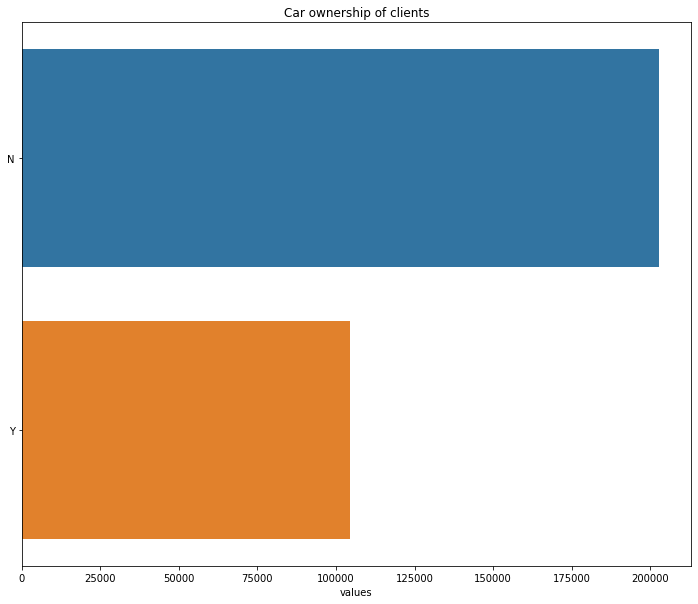

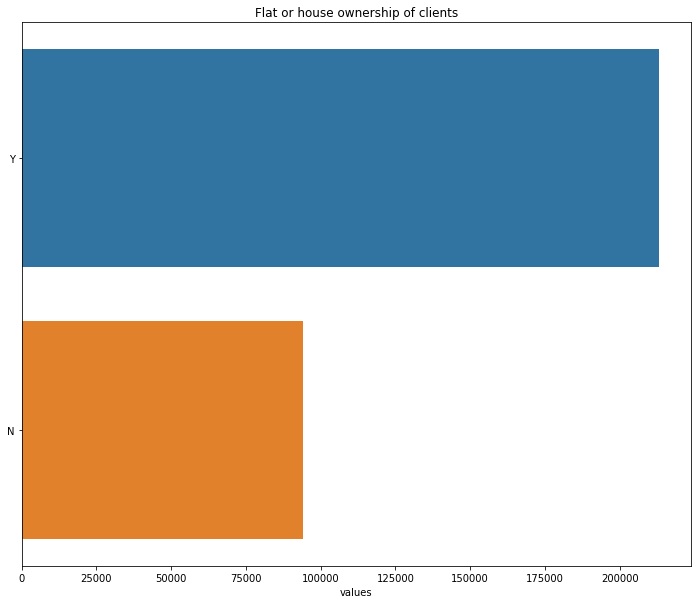

In [100]:
# Does eh client own a car?
# Does eh client own a house?
barplot('FLAG_OWN_CAR','','Car ownership of clients')
barplot('FLAG_OWN_REALTY','','Flat or house ownership of clients')


In [101]:
# clients who owns a car table 
stats('FLAG_OWN_CAR')


,FLAG_OWN_CAR,TARGET
0,N,0.085
1,Y,0.072


In [102]:
# clients who owns a house table 
stats('FLAG_OWN_REALTY')

,FLAG_OWN_REALTY,TARGET
0,N,0.083
1,Y,0.080


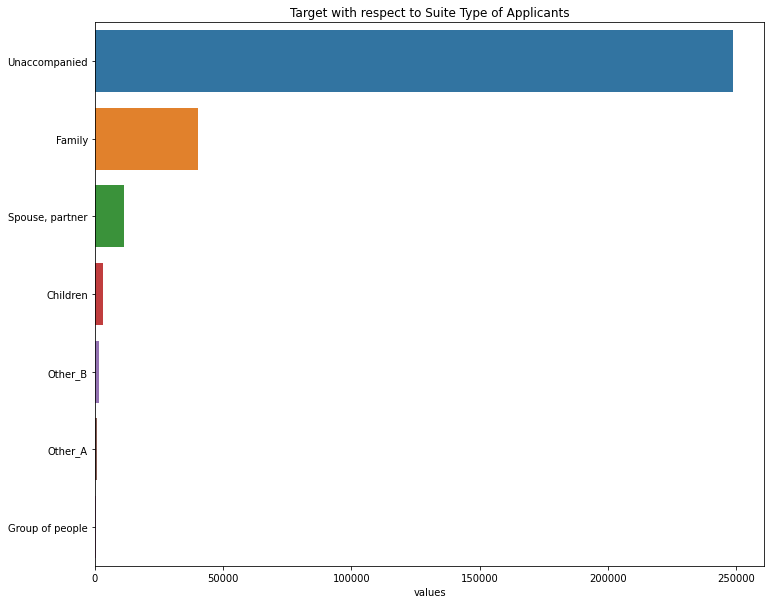

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098
3,Other_A,0.088
2,Group of people,0.085
6,Unaccompanied,0.082
5,"Spouse, partner",0.079
1,Family,0.075
0,Children,0.074


In [103]:
# What is the housingsituation of the client and his family status as well as the number of children he has?
barplot('NAME_TYPE_SUITE','', 'Target with respect to Suite Type of Applicants')
stats('NAME_TYPE_SUITE')


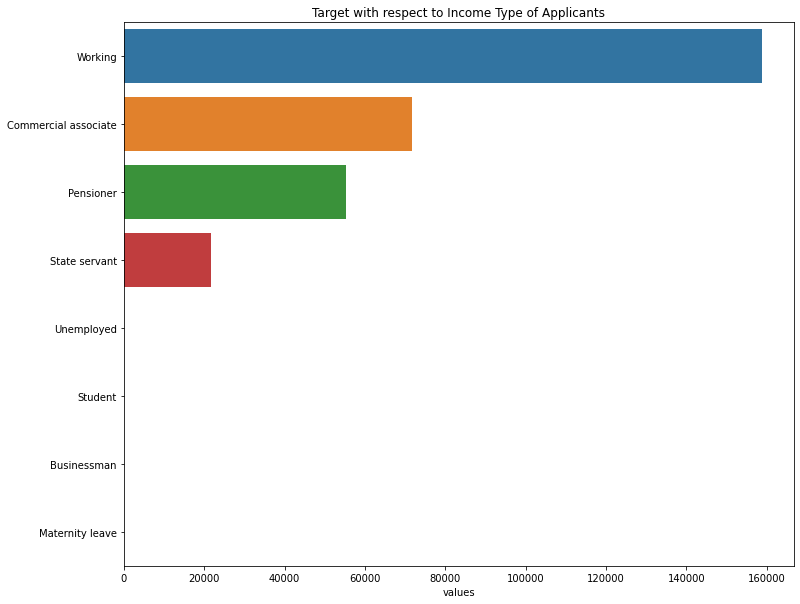

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400
6,Unemployed,0.364
7,Working,0.096
1,Commercial associate,0.075
4,State servant,0.058
3,Pensioner,0.054
0,Businessman,0.000
5,Student,0.000


In [104]:
# Type of income of applicants
barplot('NAME_INCOME_TYPE','', 'Target with respect to Income Type of Applicants')
stats('NAME_INCOME_TYPE')

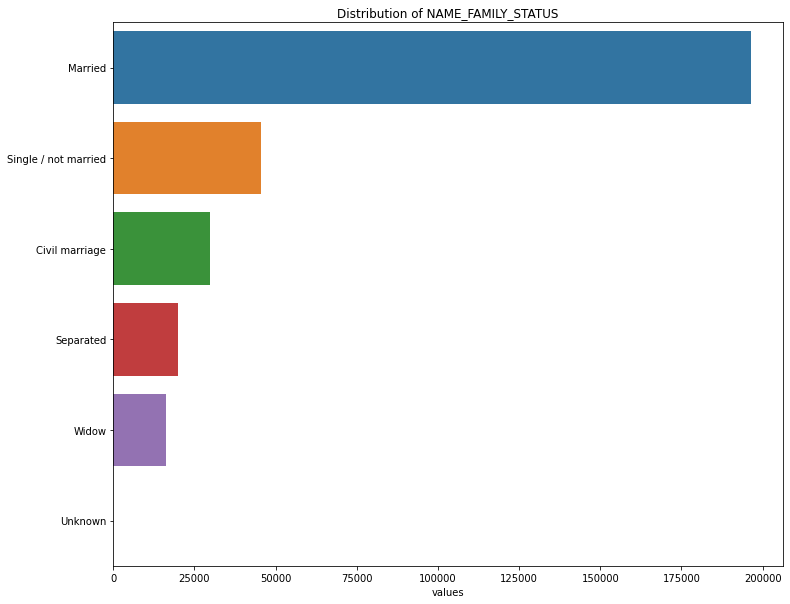

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099
3,Single / not married,0.098
2,Separated,0.082
1,Married,0.076
5,Widow,0.058
4,Unknown,0.000


In [105]:
# - what is the martal status of applicants?
barplot("NAME_FAMILY_STATUS",'', "Distribution of NAME_FAMILY_STATUS")
stats('NAME_FAMILY_STATUS')

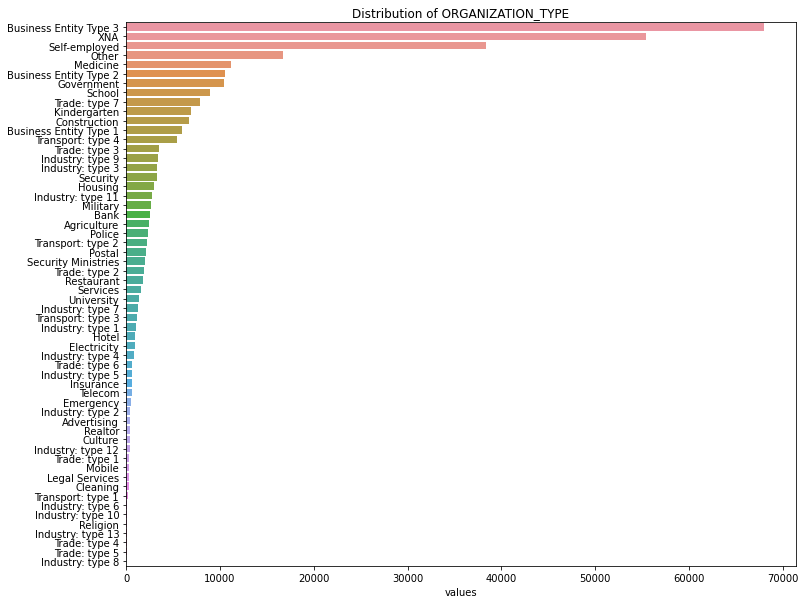

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.158
18,Industry: type 13,0.134
25,Industry: type 8,0.125
7,Construction,0.117
38,Restaurant,0.117
6,Cleaning,0.112
14,Industry: type 1,0.111
20,Industry: type 3,0.106
36,Realtor,0.106
1,Agriculture,0.105


In [106]:
# What kind of accupation does the client have and to which field of activity does he belong to?
barplot("ORGANIZATION_TYPE",'', "Distribution of ORGANIZATION_TYPE")
stats('ORGANIZATION_TYPE')

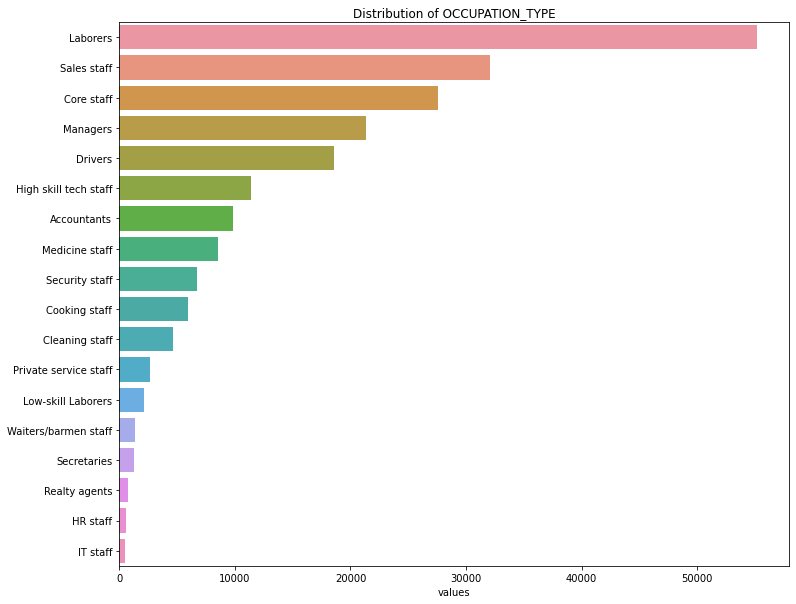

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.172
4,Drivers,0.113
17,Waiters/barmen staff,0.113
16,Security staff,0.107
8,Laborers,0.106
2,Cooking staff,0.104
1,Cleaning staff,0.096
14,Sales staff,0.096
13,Realty agents,0.079
15,Secretaries,0.070


In [107]:
barplot("OCCUPATION_TYPE",'', "Distribution of OCCUPATION_TYPE")
stats('OCCUPATION_TYPE')